In [1]:
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt

## Declaración de variables:

In [2]:
#matriz contiene los 50 primeros tiros
MQ = np.zeros((50,3))
#matriz contiene los 100 primeros tiros
MQ2 = np.zeros((100,3))
#matriz contiene los 150 primeros tiros
MQ3 = np.zeros((150,3))
#array almacena los resultados del sortea de cara-sello
J1 = []
J2 = []
#array almacena 50 tiros de la moneda
RA = []
RC = []
#array almacena 100 tiros de la moneda
RA2 = []
RC2 = []
#array almacena 150 tiros de la moneda
RA3 = []
RC3 = []

### Metodo genera numeros aleatorios

In [3]:
def gen_random():
    return np.random.random_sample()

### Metodo lanza la moneda tomando en cuenta:
- Cara los valores entre {0-0.5}
- Sello los valores entre {0.51-1}

In [4]:
def lanzar_moneda():
    num = float(gen_random())
    if num > 0.0 and num <= 0.5:
        return 1
    else:
        return 0

### Metodo toma la probabilidad del 70% para cara tomando en cuenta.
- Cara los valores entre {0-0.7}
- Sello los valores entre {0.71-1}

In [5]:
def tirar_moneda_trucada():
    num = float(gen_random())
    if num > 0.0 and num <= 0.7:
        return 1
    else:
        return 0

### Metodo recorre el vector que almacena los resultados para intercambiar sus valores:
- El valor de '1' lo remplaza por 'C'.
- El valor de '0' lo remplaza por 'S'.

In [6]:
def intercambiar(array):
    aux = []
    for i in array:
        if i == 1:
            aux.append('C')
        else:
            aux.append('S')
    return aux

### Metodo limpia los array de jugadores J1,J2

In [7]:
def limpiar():
    J1.clear()
    J2.clear()

### Metodo sortea el lado correspondiente de la moneda a cada jugador de manera aleatoria.
Para este metodo se sortea el lado correspondiente de la moneda para cada jugador siendo cara representada por el '0' y sello se representa por '1'.

In [8]:
def sortear_cara(num):
    for i in range(num):
        CM = lanzar_moneda()
        if CM == 1:
            J1.append(CM)
            J2.append(0)
        elif CM == 0: 
            J1.append(CM)
            J2.append(1)

In [9]:
def sortear_cara_trucada(num):
    for i in range(num):
        CM = tirar_moneda_trucada()
        if CM == 1:
            J1.append(CM)
            J2.append(0)
        elif CM == 0: 
            J1.append(CM)
            J2.append(1)

### Metodo llena el array cumpliendo con los 3 intentos para determinar el ganador
Recibe dos parametros:
- @num es el numero de interacciones o numero de intentos
- @array es la matriz en donde va almacenar el resultado de lanzar_moneda

In [10]:
def rellenar(num, array):
    for i in range(num):
        for j in range(3):
            array[i,j]= lanzar_moneda()

In [11]:
def rellenar_trucada(num, array):
    for i in range(num):
        for j in range(3):
            array[i,j]= tirar_moneda_trucada()

### Metodo extrae la columna de la matriz con la cual queremos trabajar.
Recibe tres parametros:
- @col numero de columna [0,1,2] de la matriz
- @num numero de interacciones
- @matriz contiene los tiros generados de [50,100,150]

In [12]:
def select_col(col, num, matriz):
    aux = []
    if col >= len(matriz[0]):
        print("Ingrese un valor menor")
    else:
        for i in range(num):
            aux.append(matriz[i,col])
    return aux

### Lanzar moneda 50 veces:
Primero sorteamos los cara de la moneda entre los jugadores, luego llenamos la matriz resultante con los lanzamientos generados.

In [13]:
sortear_cara(50)

In [14]:
rellenar(50, MQ)

### Metodo evalua los resultados generados al tirar la moneda
Recibe 4 parametros:
- @num numero de interacciones [50,100,150]
- @jugador1 array almacena los resultados del jugador [W,L,T]
- @jugador2 array almacena los resultados del jugador [W,L,T]
- @matriz contiene los tiros generados al lanzar la moneda

Compara en base al valor de la primera columna de la matriz.
- El valor de la columna inicia en '0' representar cara.
- El valor de la columna inicia en '1' representa sello.

Compara el array de los jugadores y determina cual es cara y cual es sello.
- Si el valor de las columnas es igual en todas se asigna T.
- Si el jugador 0 es cara se le asigna W caso contrario se asigna L.
- Si el jugador 1 es cara se le asigna L caso contrario se asigna W.

In [15]:
def evaluar(num, jugador1, jugador2, matriz):
    col0 = select_col(0, num, matriz)
    col1 = select_col(1, num, matriz)
    col2 = select_col(2, num, matriz)
    for i in range(num):
        if col0[i] == col1[i] == col2[i]:
            jugador1.append('T')
            jugador2.append('T')
        elif col0[i] == col1[i] or col0[i] == col2[i] or col1[i] == col2[i]:
            if col0[i] == 0 and col1[i] == 0 or col0[i] == 0 and col2[i] == 0 or col1[i] == 0 and col2[i] == 0:
                if J1 == 0:
                    jugador1.append('L')
                    jugador2.append('w')
                else:
                    jugador1.append('W')
                    jugador2.append('l')
            else:
                if J1 == 1:
                    jugador1.append('W')
                    jugador2.append('l')
                else:
                    jugador1.append('L')
                    jugador2.append('W')

### Evaluamos para los 50 primeros lanzamientos de moneda.

In [16]:
evaluar(50, RA, RC, MQ)

### Creamos un dataframe para presentar los datos generados al evaluar los 50 primeros lanzamientos de la moneda.

In [17]:
data = pd.DataFrame({'Alex': intercambiar(J1), 'Carlos': intercambiar(J2), 'T1': intercambiar(select_col(0, 50, MQ)),'T2': intercambiar(select_col(1, 50, MQ)),'T3': intercambiar(select_col(2, 50, MQ)),'Win':RA,'Loss': RC })

In [18]:
data.head(10)

Alex Carlos T1 T2 T3 Win Loss
0    C      S  S  C  S   W    l
1    C      S  S  S  S   T    T
2    S      C  C  C  S   L    W
3    S      C  S  S  C   W    l
4    C      S  S  S  S   T    T
5    C      S  S  C  S   W    l
6    S      C  S  C  C   L    W
7    C      S  S  S  S   T    T
8    S      C  C  C  S   L    W
9    S      C  C  C  S   L    W

### Para realizar los 100 tiros siguentes realizamos los siguiente:
- LLamamos al metodo limpiar para vaciar los arreglos de J1,J2.

In [19]:
limpiar()

- Sorteamos la cara nuevamente entre los jugadores.

In [20]:
sortear_cara(100)

- Llenamos la nueva matriz con los tiros generados.

In [21]:
rellenar(100, MQ2)

- Evaluamos los resultados generados al lanzar la moneda.

In [22]:
evaluar(100, RA2, RC2, MQ2)

### Creamos un dataframe para presentar los datos generados al evaluar los 100 lanzamientos de la moneda.

In [23]:
data2 = pd.DataFrame({'Alex': intercambiar(J1), 'Carlos': intercambiar(J2), 'T1': intercambiar(select_col(0, 100, MQ2)),'T2': intercambiar(select_col(1, 100, MQ2)),'T3': intercambiar(select_col(2, 100, MQ2)),'Win':RA2,'Loss': RC2 })

In [24]:
data2.head(10)

Alex Carlos T1 T2 T3 Win Loss
0    C      S  C  S  S   W    l
1    C      S  S  S  S   T    T
2    C      S  S  S  S   T    T
3    S      C  C  C  S   L    W
4    C      S  S  C  S   W    l
5    S      C  C  S  C   L    W
6    S      C  S  S  S   T    T
7    C      S  C  S  C   L    W
8    S      C  C  S  S   W    l
9    C      S  S  C  S   W    l

### Para realizar los 150 tiros siguentes realizamos los siguiente:
- LLamamos al metodo limpiar para vaciar los arreglos de J1,J2.

In [25]:
limpiar()

- Sorteamos la cara nuevamente entre los jugadores.

In [26]:
sortear_cara(150)

- Llenamos la nueva matriz con los tiros generados.

In [27]:
rellenar(150, MQ3)

- Evaluamos los resultados generados al lanzar la moneda.

In [28]:
evaluar(150, RA3, RC3, MQ3)

### Creamos un dataframe para presentar los datos generados al evaluar los 150 lanzamientos de la moneda.

In [29]:
data3 = pd.DataFrame({'Alex': intercambiar(J1), 'Carlos': intercambiar(J2), 'T1': intercambiar(select_col(0, 150, MQ3)),'T2': intercambiar(select_col(1, 150, MQ3)),'T3': intercambiar(select_col(2, 150, MQ3)),'Win':RA3,'Loss': RC3 })

In [30]:
data3.head(10)

Alex Carlos T1 T2 T3 Win Loss
0    C      S  S  S  C   W    l
1    S      C  C  S  S   W    l
2    S      C  C  S  C   L    W
3    C      S  S  C  C   L    W
4    C      S  S  C  C   L    W
5    C      S  S  C  C   L    W
6    C      S  S  C  C   L    W
7    C      S  S  C  C   L    W
8    S      C  S  C  S   W    l
9    S      C  C  S  C   L    W

### Metodos realizan el contero de las veces que gano, perdio y empato un jugador.

In [31]:
#Metodo realiza el conteo de cuantas veces gano un jugador
def cont_win(array): 
    win = 0
    for i in range(len(array)):
        if array[i] == 'W':
            win += 1
    return win
      
#Metodo realiza el conteo de cuantas veces perdio un jugador
def cont_loss(array):
    loss = 0
    for i in range(len(array)):
        if array[i] == 'L':
            loss += 1
    return loss

#Metodo realiza el conteo de cuantas veces empato un jugador
def cont_tie(array):
    tie = 0
    for i in range(len(array)):
        if array[i] == 'T':
            tie += 1
    return tie

### Winner VS Lose

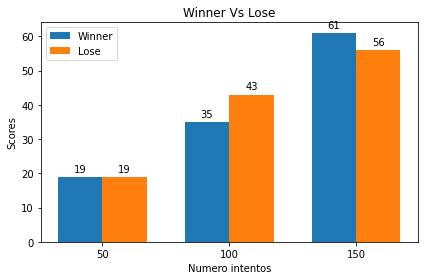

In [32]:
labels = ['50', '100', '150']
winners = [cont_win(RA), cont_win(RA2), cont_win(RA3)]
lose = [cont_loss(RA), cont_loss(RA2), cont_loss(RA3)]

x = np.arange(len(labels))  # the label locations
width = 0.35  # the width of the bars

fig, ax = plt.subplots()
rects1 = ax.bar(x - width/2, winners, width, label='Winner')
rects2 = ax.bar(x + width/2, lose, width, label='Lose')

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_title('Winner Vs Lose')
ax.set_ylabel('Scores')
ax.set_xlabel('Numero intentos')
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend()

def autolabel(rects):
    """Attach a text label above each bar in *rects*, displaying its height."""
    for rect in rects:
        height = rect.get_height()
        ax.annotate('{}'.format(height),
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom')

autolabel(rects1)
autolabel(rects2)
fig.tight_layout()
plt.show()

In [33]:
RF = []

In [34]:
def unir(array):
    for i in range(len(array)):
        RF.append(array[i])

In [35]:
unir(RA)
unir(RA2)
unir(RA3)

In [36]:
len(RC2)

100

### Grafica de porcentajes  de winner, lose, tie

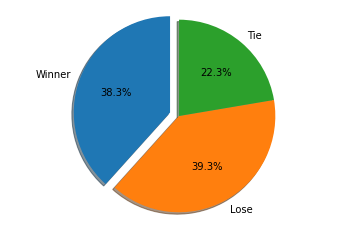

In [37]:
# Pie chart, where the slices will be ordered and plotted counter-clockwise:
labels = 'Winner', 'Lose', 'Tie'
sizes = [cont_win(RF), cont_loss(RF), cont_tie(RF)]
explode = (0.1, 0, 0)  # only "explode" the 2nd slice (i.e. 'Hogs')

fig1, ax1 = plt.subplots()
ax1.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90)
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

plt.show()

In [38]:
def limpiar_matriz():
    MQ.fill(0)
    MQ2.fill(0)
    MQ3.fill(0)
    RA.clear()
    RA2.clear()
    RA3.clear()
    RC.clear()
    RC2.clear()
    RC3.clear()

In [39]:
limpiar_matriz()

### Sortear moneda con probabilidad del 70% de ganar.
- Lanzar los 50 veces la moneda

In [40]:
sortear_cara_trucada(50)
rellenar_trucada(50, MQ)
evaluar(50, RA, RC, MQ)

- Lanzar 100 veces la moneda

In [41]:
sortear_cara_trucada(100)
rellenar_trucada(100, MQ2)
evaluar(100, RA2, RC2, MQ2)

- Lanzar 150 veces la moneda.

In [42]:
sortear_cara_trucada(150)
rellenar_trucada(150, MQ3)
evaluar(150, RA3, RC3, MQ3)

### Grafica de la moneda con 70% de probabilidad de ganar.

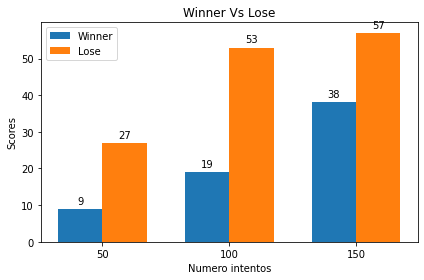

In [43]:
labels = ['50', '100', '150']
winners = [cont_win(RA), cont_win(RA2), cont_win(RA3)]
lose = [cont_loss(RA), cont_loss(RA2), cont_loss(RA3)]

x = np.arange(len(labels))  # the label locations
width = 0.35  # the width of the bars

fig, ax = plt.subplots()
rects1 = ax.bar(x - width/2, winners, width, label='Winner')
rects2 = ax.bar(x + width/2, lose, width, label='Lose')

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_title('Winner Vs Lose')
ax.set_ylabel('Scores')
ax.set_xlabel('Numero intentos')
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend()

def autolabel(rects):
    """Attach a text label above each bar in *rects*, displaying its height."""
    for rect in rects:
        height = rect.get_height()
        ax.annotate('{}'.format(height),
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom')

autolabel(rects1)
autolabel(rects2)
fig.tight_layout()
plt.show()

In [44]:
RF.clear()

In [45]:
unir(RA)
unir(RA2)
unir(RA3)

### Grafica de porcentajes con 70%.

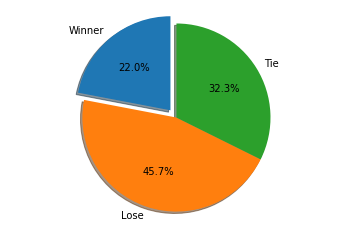

In [46]:
# Pie chart, where the slices will be ordered and plotted counter-clockwise:
labels = 'Winner', 'Lose', 'Tie'
sizes = [cont_win(RF), cont_loss(RF), cont_tie(RF)]
explode = (0.1, 0, 0)  # only "explode" the 2nd slice (i.e. 'Hogs')

fig1, ax1 = plt.subplots()
ax1.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90)
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

plt.show()